In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import cv2

### Ex 01:Calculating sigmoid

In [6]:
# Ex 01: Calculating sigmoid
def basic_sigmoid(x):
    s = 1 / (1 + math.exp(-x))
    return s

s = 1
print('Sigmoid of {} = {}'.format(s, basic_sigmoid(s)))

Sigmoid of 1 = 0.7310585786300049


### Ex 02: Sigmoid on an array

In [4]:
# Ex 02: Sigmoid on array
x = [1, 2, 3]

def sigmoid_naive(x):
    rs = []
    for i in x:
        rs.append(basic_sigmoid(i))
    return rs

def sigmoid(x):
    x = np.array(x)
    y = 1 / (1 + np.exp(-x))
    return y

print(sigmoid(x))

[0.73105858 0.88079708 0.95257413]


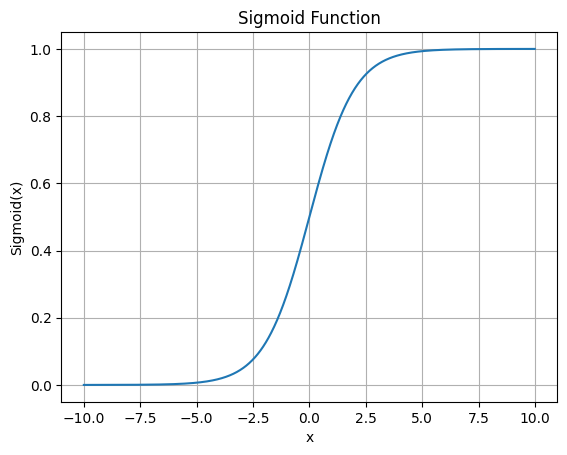

In [5]:
# Bonus: Plotting sigmoid function
x = np.arange(-10, 10, 0.01)
y = sigmoid(x)

plt.plot(x, y)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('Sigmoid(x)')
plt.title('Sigmoid Function')
plt.show()


### Ex 03: Sigmoid's gradient

In [7]:
def sigmoid_derivative(x):
    x = np.array(x)
    s = sigmoid(x)
    ds = s * (1 - s)
    return ds

arr = [1, 2, 3]
rs = sigmoid_derivative(arr)
print(rs)

[0.19661193 0.10499359 0.04517666]


### Ex 04: Image to Vector

In [8]:
"""
    Ex 04: Image to Vector
    Method 01: flatten()
    Method 02: ravel()
    Method 03: reshape()
"""
def image2vector(image):
    """
    Assuming that image is an numpy array
    """
    # Flatten()
    v = image.flatten()
    # Ravel()
    v = image.ravel()
    # Reshape()
    v = image.reshape(-1)
    return v

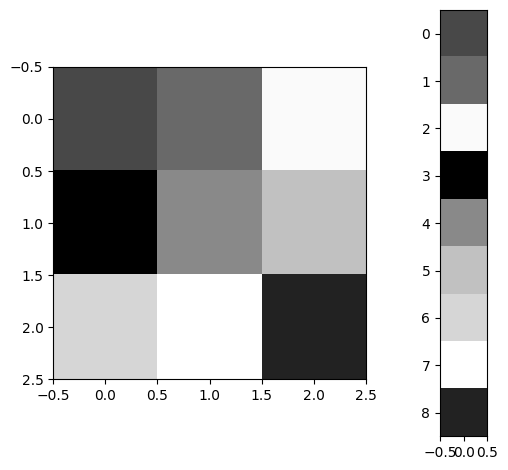

In [29]:
image = np.random.rand(3, 3, 1)
v = image2vector(image)

# Plot using matplotlib
# Create a figure and axis
fig, ax = plt.subplots(ncols=2, nrows=1)

# Display the image data as a heatmap
ax[0].imshow(image, cmap='gray')
ax[1].imshow(np.expand_dims(v, 1), cmap='gray')

## Saving the plot
#plt.savefig('./plot_ex04.png')

# Show the plot
plt.tight_layout()
plt.show()

### Ex 05: Normalizing data

In [33]:
def normalize_rows(x):
    norm = np.linalg.norm(x, axis=1, keepdims=True)
    x = x / norm
    return x

x = np.array([[0, 4, 3], [4, 5, 6]])
rs = normalize_rows(x)
print(rs)

[[0.         0.8        0.6       ]
 [0.45584231 0.56980288 0.68376346]]


### Ex 06: Softmax

In [34]:
def softmax(x):
    x_exp = np.exp(x)
    x_sum = np.sum(x_exp, axis=1, keepdims=True)
    s = x_exp / x_sum
    return s

x = np.array([[1, 2, 3, 0, 0], [4, 5, 6, 7, 8]])
rs = softmax(x)
print(rs)

[[0.08443737 0.22952458 0.6239125  0.03106277 0.03106277]
 [0.01165623 0.03168492 0.08612854 0.23412166 0.63640865]]


### Ex 07: L1 cost

In [36]:
def L1(y, yhat):
    diff = np.abs(yhat - y)
    loss = np.sum(diff)
    return loss

y = np.array([0.8, 0.4, 0.1, 0.4])
yhat = np.array([1, 1, 0, 1])
rs = L1(y, yhat)
print(rs)

1.5


### Ex 08: L2 cost

In [38]:
def L2(y, yhat):
    sqr_diff = np.square(yhat - y)
    loss = np.sum(sqr_diff)
    return loss

y = np.array([0.8, 0.4, 0.1, 0.4])
yhat = np.array([1, 1, 0, 1])
rs = L2(y, yhat)
print(rs)

0.77


### Ex 09: Reading, Coverting, Resizing an image

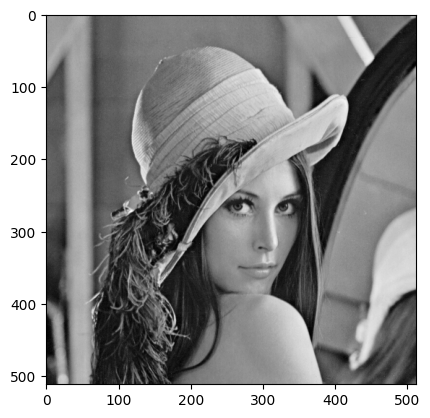

In [54]:
# Using plt to show
img = cv2.imread('./asset/lenna_dump.png', cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap='gray')
plt.show()

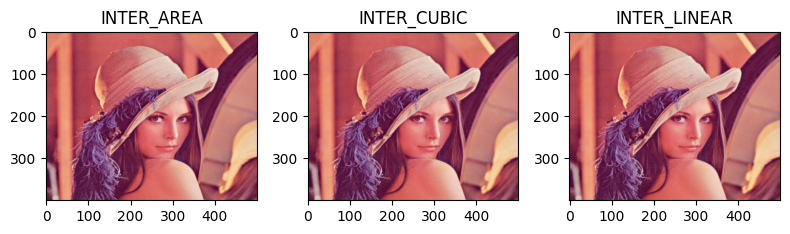

In [67]:
fig, axs = plt.subplots(figsize=(8, 6), nrows=1, ncols=3)

new_size = (500, 400)
img = cv2.imread('./asset/lenna_dump.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
resize_1 = cv2.resize(img, new_size, cv2.INTER_AREA)
resize_2 = cv2.resize(img, new_size, cv2.INTER_CUBIC)
resize_3 = cv2.resize(img, new_size, cv2.INTER_LINEAR)

axs[0].imshow(resize_1)
axs[0].set_title('INTER_AREA')
axs[1].imshow(resize_2)
axs[1].set_title('INTER_CUBIC')
axs[2].imshow(resize_3)
axs[2].set_title('INTER_LINEAR')

plt.tight_layout()
plt.show()

### Ex 10: Resizing with a same scale

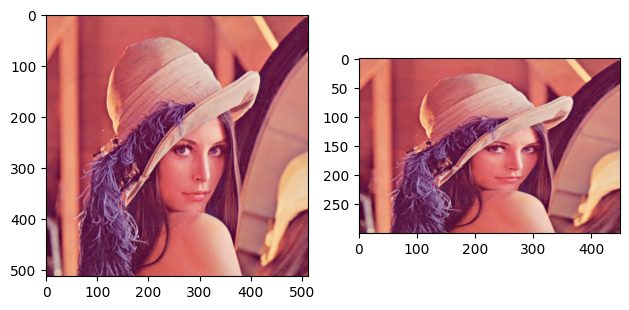

In [69]:
# new image which doesn't have a same scale with the original image
img_path = './asset/lenna_dump.png'
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

new_shape = (450, 300)
new_img = cv2.resize(img, new_shape)

_, axs = plt.subplots(nrows=1, ncols=2)
axs[0].imshow(img)
axs[1].imshow(new_img)

plt.tight_layout()
plt.show()

Original shape:  (512, 512)
New shape with the same ratio:  (300, 300)


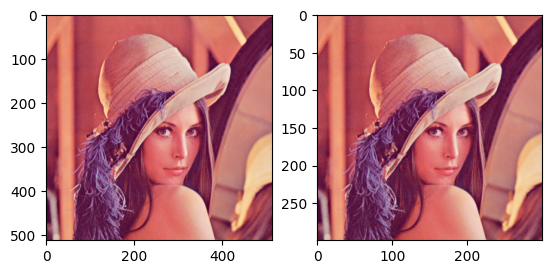

In [85]:
new_width = 300
old_height, old_width, _ = img.shape

# Method 1
img_scale = old_width / old_height
new_height = int(new_width // img_scale)

# Method 2
#ratio = new_width / old_width
#new_height = int(old_height * ratio)

new_shape = (new_width, new_height)
print('Original shape: ', (old_width, old_height))
print('New shape with the same ratio: ', new_shape)
new_img = cv2.resize(img, new_shape)

_, axs = plt.subplots(nrows=1, ncols=2)
axs[0].imshow(img)
axs[1].imshow(new_img)

plt.show()